<a href="https://colab.research.google.com/github/Lucasfonseca2002/Introdu-o-a-Data-Science/blob/main/Introdu%C3%A7%C3%A3o_a_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O propósito dessa análise é fazer o levantamento de algumas informações importantes a respeito de um serie de filmes, fazendo a sua classificação, notas e demais assuntos.


### Fazendo a importação da bibilioteca Pandas

In [ ]:
import pandas as pd

### Importando a base de dados e ser utilizada durante a análise

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Análises iniciais

In [ ]:
notas.shape  # Verificando o tamanho do banco de dados

(100836, 4)

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'notas', 'momento']  # Renomeando as colunas do banco de dados
notas

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas.head()  # Verificando as primeiras linhas do banco de dados

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['notas'].unique()  # Verificando os valores unicos da coluna notas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['notas'].value_counts()  # Verificando a quantidade de valores unicos da coluna notas

notas
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [ ]:
notas['notas'].mean()  # Verificando a media da coluna notas

3.501556983616962

<Axes: ylabel='Frequency'>

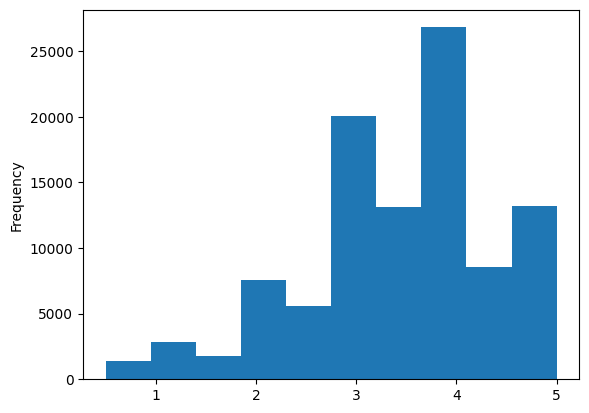

In [ ]:
notas['notas'].plot(kind = 'hist')  # Verificando a distribuição da coluna notas

In [ ]:
notas['notas'].describe() # Análisando a descrição da columa de notas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

In [ ]:
media = notas['notas'].mean() # Calculando a media da coluna notas
mediana = notas['notas'].median() # Calculando a mediana da coluna notas

### Importando a bibilioteca Seaborn para visualizar a distribuição das notas na coluna de notas

<Axes: ylabel='notas'>

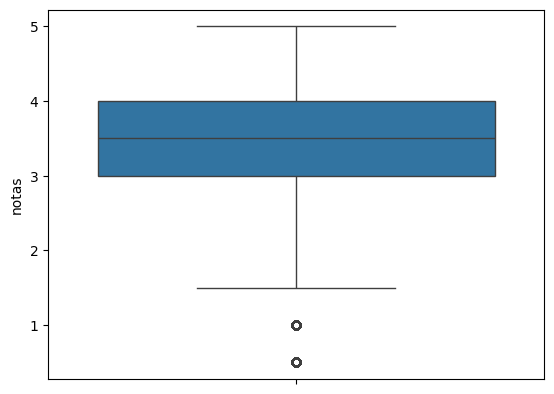

In [ ]:
import seaborn as sns

sns.boxplot(notas['notas'])

### Importando um novo dataframe de filmes

In [ ]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv')
filmes.columns = ['filmesId', 'titulo', 'generos']
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Explorando o dataframe

In [ ]:
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.query("filmeId==1") # Extraindo apenas as notas do filme 1 utilizando o metodo query()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas.query("filmeId==1")['notas'].mean() #media do filme 1

3.9209302325581397

In [ ]:
notas.query("filmeId==2")['notas'].mean() #media do filme 2

3.4318181818181817

In [ ]:
medias_por_filme = notas.groupby('filmeId')['notas'].mean() # Agrupando a media de notas por filme utilizando o  metodo groupby()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

<Axes: ylabel='Frequency'>

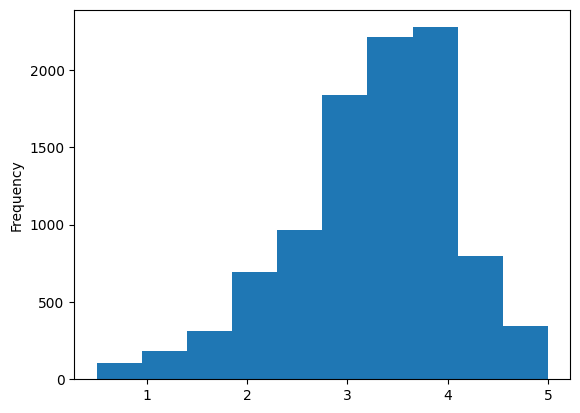

In [ ]:
medias_por_filme.plot(kind = 'hist') # Visualizando a distribuição da media de notas por filme utilizando o metodo plot()

<Axes: ylabel='notas'>

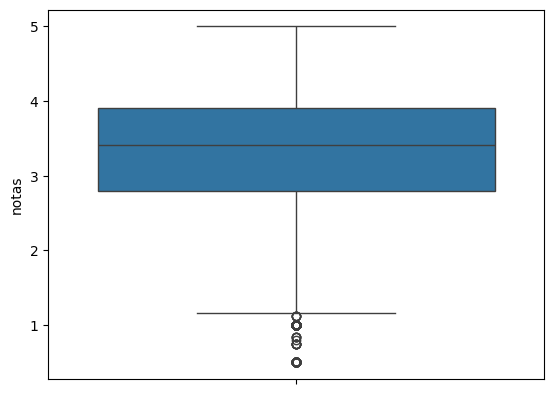

In [ ]:
sns.boxplot(medias_por_filme) # Visualizando a distribuição da media de notas por filme utilizando o metodo boxplot()

In [ ]:
medias_por_filme.describe() # Analisando a descrição da media de notas por filme utilizando o metodo describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

### Importando a bibilioteca **mathplotlib** para visualizar de maneira clara a distribuição da média das notas dos filmes

Text(0.5, 1.0, 'Histograma das médias dos Filmes')

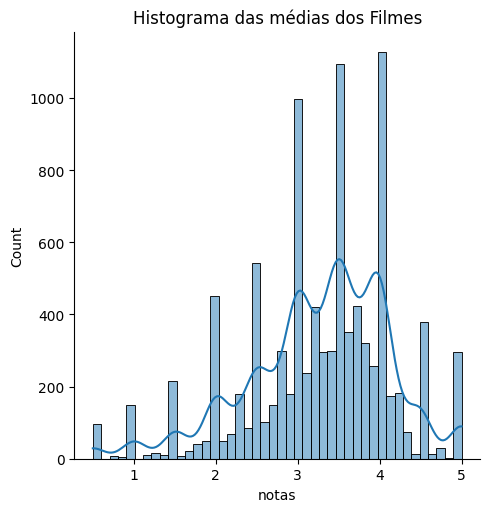

In [ ]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde = True)
plt.title('Histograma das médias dos Filmes')


### Explorando um database mais detalhando, conseguindo verificar os orçamentos gastos para o desenvolvimento de cada filme, além de conseguir verificar o genêro do filme, linguaguem padrão, popularidade e detalhes aprofundados

In [ ]:
tmdb = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv')
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


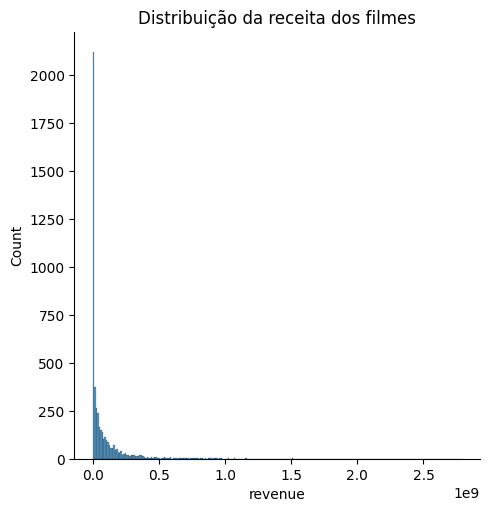

In [ ]:
# Utilizando o seaborn para ver a distribuição das receitas do filme

sns.displot(tmdb['revenue'])
plt.title('Distribuição da receita dos filmes')
plt.show()

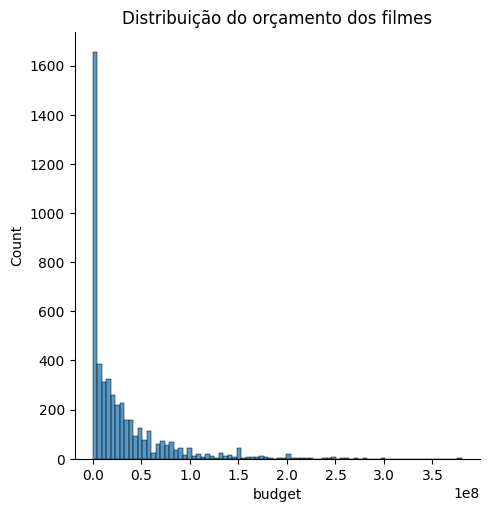

In [ ]:
import matplotlib.pyplot as plt
sns.displot(tmdb['budget'])
plt.title('Distribuição do orçamento dos filmes')
plt.show()


In [ ]:
tmdb.info()  #Verificando as informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.describe() # Verificando a descrição do dataframe

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


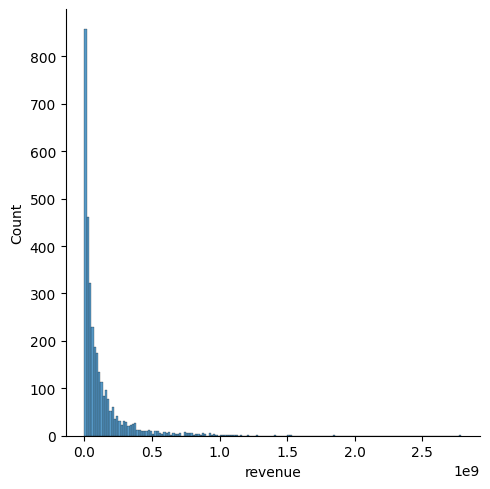

In [ ]:
com_faturamento = tmdb.query('revenue > 500') # Verificando as receitas dos filmes acima de 500 dólares
sns.displot(com_faturamento['revenue'])

In [ ]:
tmdb['original_language'].unique() # Verificando os idiomas unicos apresentados na coluna 'original_language'

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [ ]:
tmdb['original_language'].value_counts().values # Verificando a quantidade de filmes por idioma

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index() # Criando um dataframe com a contagem de filmes por idioma
contagem_de_lingua.columns = ['original_language','total']
contagem_de_lingua.head()

<Axes: xlabel='original_language', ylabel='total'>

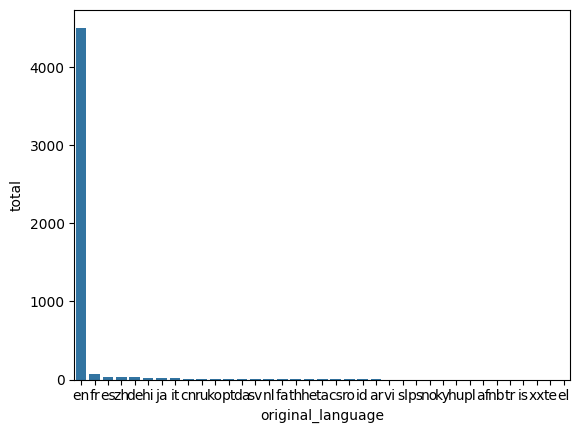

In [ ]:
sns.barplot(data = contagem_de_lingua, x = 'original_language', y = 'total') # Visualização da contagens de filme por lingua nativa

In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados


,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

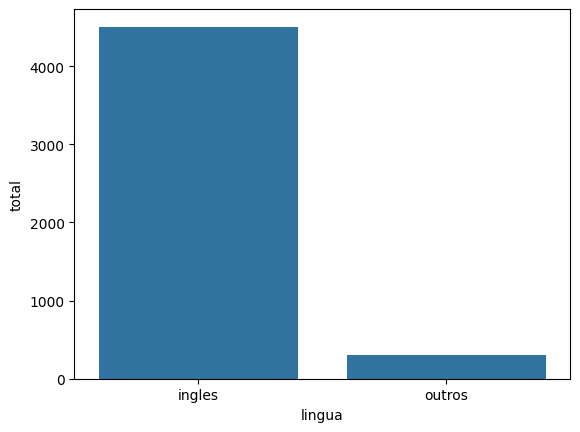

In [ ]:
sns.barplot(data = dados, x = 'lingua', y = 'total') # Visualização da contagens de filme por lingua nativa

<Axes: ylabel='total'>

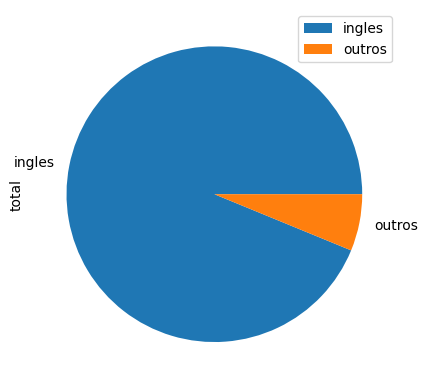

In [ ]:
dados.plot(kind = 'pie', y = 'total', labels = dados['lingua'])

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query('original_language !="en"')['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

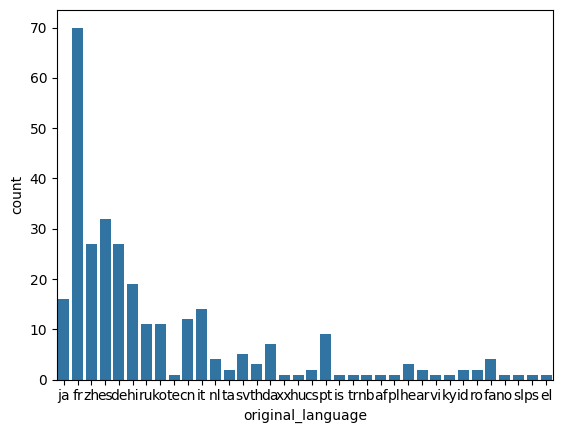

In [ ]:
sns.countplot(data = tmdb.query('original_language != "en"'), x = 'original_language')

<Axes: xlabel='original_language', ylabel='count'>

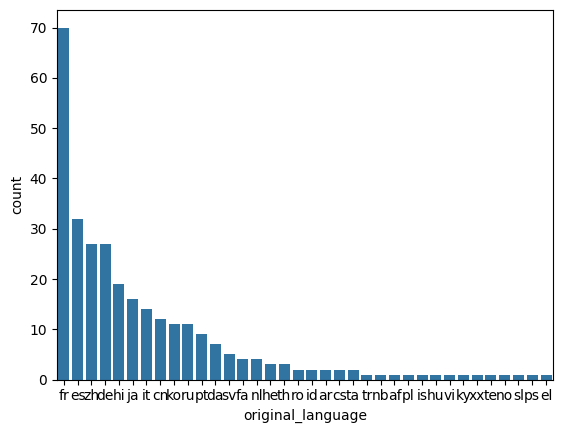

In [ ]:
sns.countplot(data = tmdb.query('original_language != "en"'),
              order = total_de_outros_filmes_por_lingua.index,
              x = 'original_language')

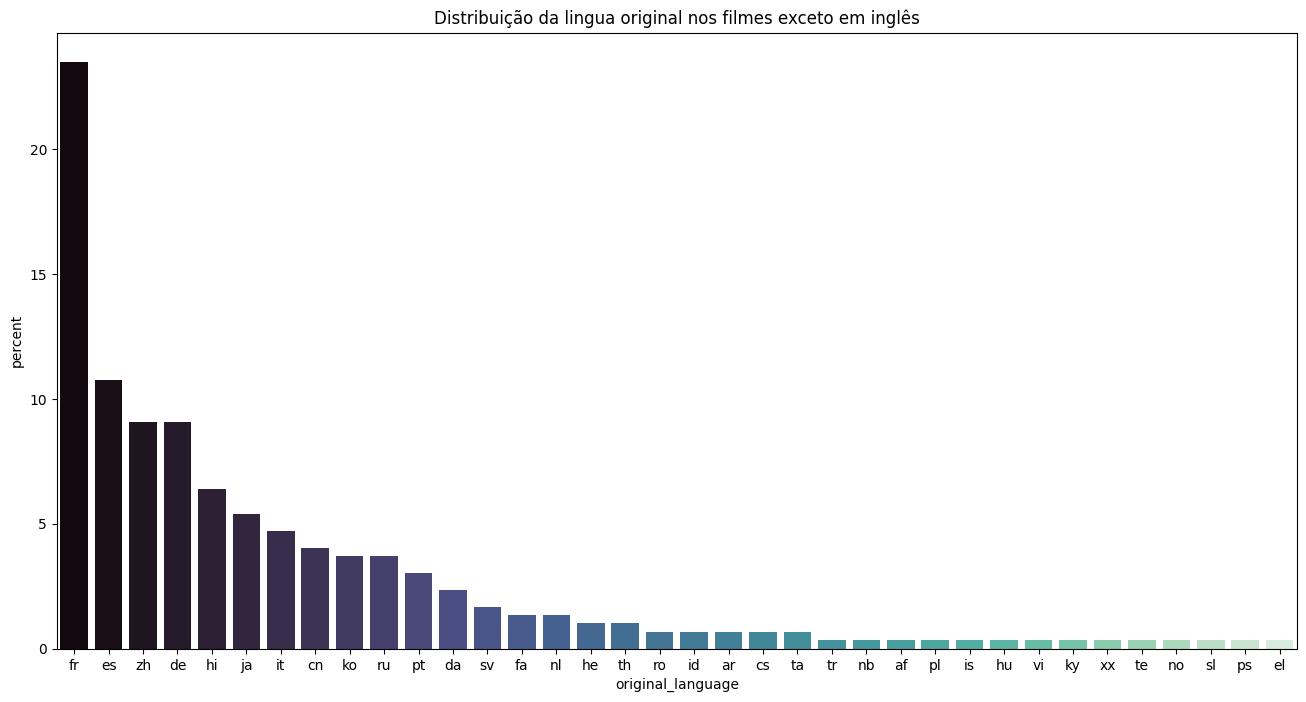

In [ ]:
plt.figure(figsize = (16, 8))
sns.countplot(data = tmdb.query('original_language != "en"'),
              order = total_de_outros_filmes_por_lingua.index,
              palette = 'mako',
              hue = 'original_language',
              hue_order = total_de_outros_filmes_por_lingua.index,
              stat = 'percent',
              x = 'original_language')
plt.title("Distribuição da lingua original nos filmes exceto em inglês")
plt.show()

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query('original_language !="en"')['original_language'].value_counts(normalize = True)
total_de_outros_filmes_por_lingua.head()

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
Name: proportion, dtype: float64

In [ ]:
notas_do_toy_story = notas.query('filmeId == 1')['notas']
notas_do_jumanji = notas.query('filmeId == 2')['notas']

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)




3.9209302325581397 3.4318181818181817


In [ ]:
import numpy as np
filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10

In [ ]:
# Calculate the mean
media_filme1 = np.mean(filme1)
media_filme2 = np.mean(filme2)

# Calculate the median
mediana_filme1 = np.median(filme1)
mediana_filme2 = np.median(filme2)

# Print the results
print(f"Média do filme 1: {media_filme1}")
print(f"Mediana do filme 1: {mediana_filme1}")

print(f"Média do filme 2: {media_filme2}")
print(f"Mediana do filme 2: {mediana_filme2}")


Média do filme 1: 3.0
Mediana do filme 1: 3.0
Média do filme 2: 3.0
Mediana do filme 2: 3.0


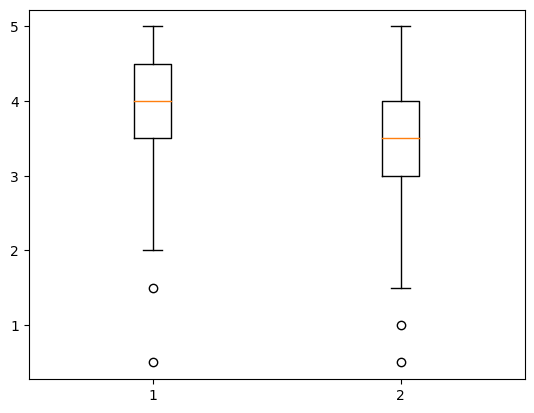

In [ ]:
notas_do_toy_story = notas.query('filmeId == 1')['notas']
notas_do_jumanji = notas.query('filmeId == 2')['notas']

plt.boxplot([notas_do_toy_story, notas_do_jumanji])
plt.show()

<Axes: xlabel='filmeId', ylabel='notas'>

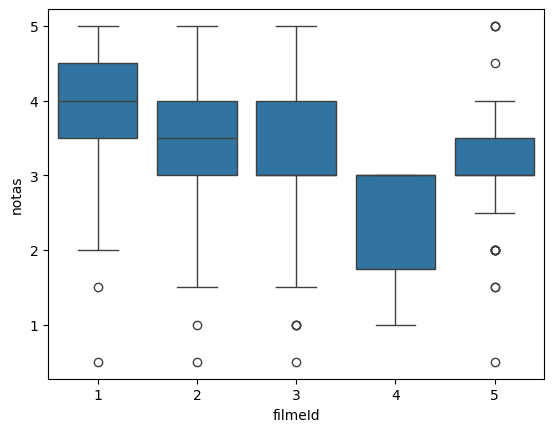

In [ ]:
sns.boxplot(data = notas.query('filmeId in [1,2,3,4,5]'), x = 'filmeId', y = 'notas')

<ipython-input-59-63808bb97a9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query('filmeId in [1,2,3,4,5]'), x='filmeId', y='notas', palette='Set2')


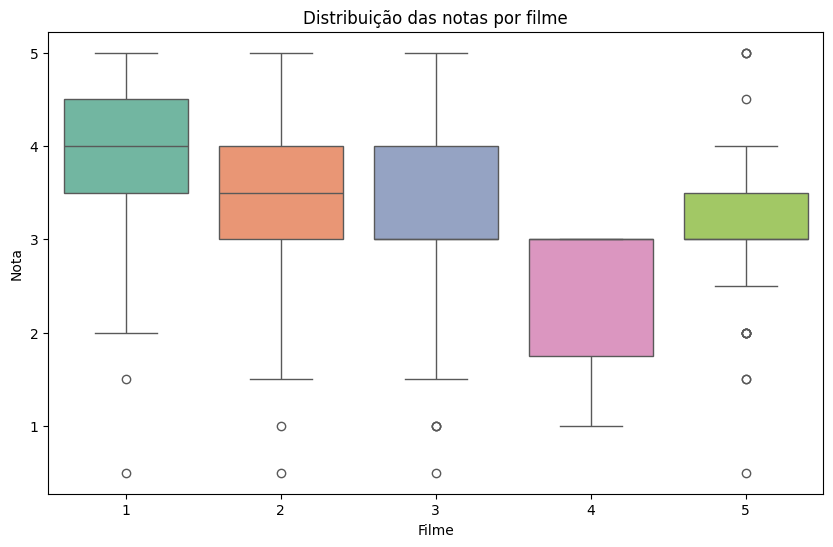

In [ ]:
# prompt: mesmo grafico porem colorido

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=notas.query('filmeId in [1,2,3,4,5]'), x='filmeId', y='notas', palette='Set2')
plt.xlabel('Filme')
plt.ylabel('Nota')
plt.title('Distribuição das notas por filme')
plt.show()


In [ ]:
notas.groupby('filmeId').count()

,usuarioId,notas,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
notas['filmeId'].value_counts().tail() # Verificando os filmes com menos notas

filmeId
86279     1
86922     1
5962      1
87660     1
163981    1
Name: count, dtype: int64

In [ ]:
notas.groupby('filmeId').count().query('notas == 1') # Verificando os filmes com apenas uma nota

,usuarioId,notas,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
